<a href="https://colab.research.google.com/github/hongkyuh/colab_test/blob/main/API%EA%B3%BC%EC%A0%9C_%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94_%EB%AA%A8%EB%8D%B8_%EB%A7%8C%EB%93%A4%EA%B8%B0_%ED%8C%80%EB%B3%84_2%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오토인코더 모델로 이미지 8개 이상 만들기

## mnist 데이터셋 사용

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


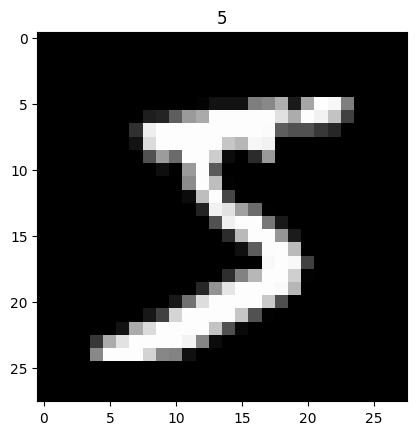

훈련용 데이터의 형태: (60000, 784) 테스트용 데이터의 형태: (10000, 784)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)           

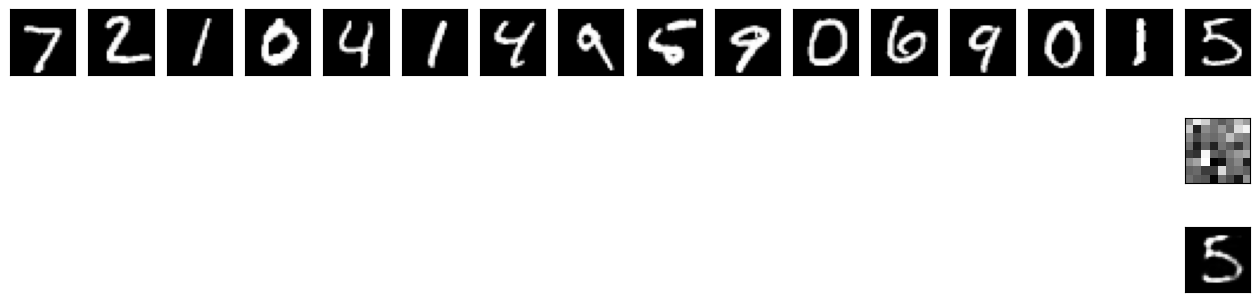

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, t_train),(x_test, t_test) = mnist.load_data()
#MNIST 읽어 들이기
print(x_train.shape,x_test.shape)
#28x28의 손으로 쏜 문자 이미지가 6만장

x_train = x_train / 255
x_test = x_test / 255

plt.imshow(x_train[0].reshape(28, 28), cmap="gray")
plt.title(t_train[0])
plt.show()

x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0], -1)
print("훈련용 데이터의 형태:",x_train.shape, "테스트용 데이터의 형태:",x_test.shape)

epochs = 20
batch_size = 128
n_in_out = 784
n_mid = 64

from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense

x = Input(shape=(n_in_out,))
encoder = Dense(n_mid, activation="relu")
decoder = Dense(n_in_out,activation="sigmoid")

h = encoder(x)
y = decoder(h)

model_autoencoder = Model(x, y)
model_autoencoder.compile(optimizer="adam",loss="binary_crossentropy")
model_autoencoder.summary()
print()

model_encoder = Model(x, h)
model_encoder.summary()
print()

input_decoder = Input(shape=(n_mid,))
model_decoder = Model(input_decoder, decoder(input_decoder))
model_decoder.summary()

model_autoencoder.fit(x_train,x_train,shuffle=True,
                      epochs=epochs,
                      batch_size=batch_size,
                      validation_data=(x_test,x_test))

encoded = model_encoder.predict(x_test)
decoded = model_decoder.predict(encoded)

n= 16
plt.figure(figsize=(16,4))
for i in range(n):
  ax = plt.subplot(3, n , i+1)
  plt.imshow(x_test[i].reshape(28, 28), cmap= "Greys_r")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


ax = plt.subplot(3, n, i+1+n)
plt.imshow(encoded[i].reshape(8,8),cmap="Greys_r")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(3, n , i+1+2*n)
plt.imshow(decoded[i].reshape(28, 28), cmap="Greys_r")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

## cifar-10 데이터셋 사용

Epoch 1/10
391/391 [==============================] - 9s 16ms/step - loss: 0.5951 - val_loss: 0.5773
Epoch 2/10
391/391 [==============================] - 5s 13ms/step - loss: 0.5722 - val_loss: 0.5713
Epoch 3/10
391/391 [==============================] - 6s 14ms/step - loss: 0.5689 - val_loss: 0.5675
Epoch 4/10
391/391 [==============================] - 5s 13ms/step - loss: 0.5665 - val_loss: 0.5653
Epoch 5/10
391/391 [==============================] - 5s 13ms/step - loss: 0.5644 - val_loss: 0.5639
Epoch 6/10
391/391 [==============================] - 5s 13ms/step - loss: 0.5630 - val_loss: 0.5662
Epoch 7/10
391/391 [==============================] - 5s 13ms/step - loss: 0.5630 - val_loss: 0.5628
Epoch 8/10
391/391 [==============================] - 5s 13ms/step - loss: 0.5616 - val_loss: 0.5623
Epoch 9/10
391/391 [==============================] - 5s 13ms/step - loss: 0.5611 - val_loss: 0.5623
Epoch 10/10
1/1 [==============================] - 0s 88ms/step


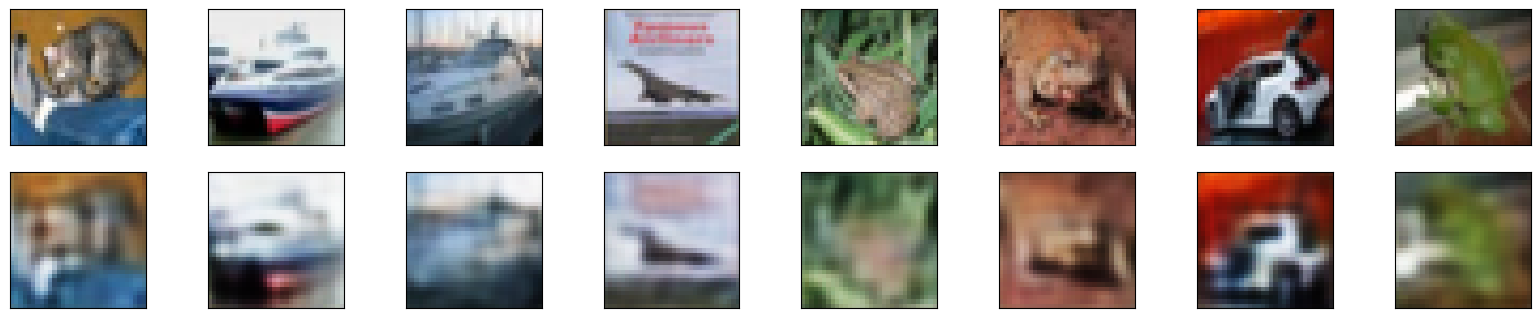

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# 데이터셋 로드
(x_train, _), (x_test, _) = cifar10.load_data()

# 데이터 전처리
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 모델 구축
input_shape = (32, 32, 3)  # CIFAR-10 이미지 크기
latent_dim = 128  # 잠재 공간 차원

# 인코더 모델 정의
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# 디코더 모델 정의
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# 오토인코더 모델 정의
autoencoder = Model(inputs, decoded)

# 오토인코더 모델 컴파일
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 오토인코더 모델 학습
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# 인코더 모델 정의
encoder = Model(inputs, encoded)

# 잠재 공간에서 샘플링하여 이미지 생성
n = 8  # 생성할 이미지 개수
encoded_imgs = encoder.predict(x_test[:n])
decoded_imgs = autoencoder.predict(x_test[:n])

# 이미지 출력
plt.figure(figsize=(20, 6))
for i in range(n):
    # 원본 이미지 출력
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성된 이미지 출력
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## fashion mnist 데이터셋 사용

Epoch 1/10
469/469 [==============================] - 5s 5ms/step - loss: 0.3744 - val_loss: 0.3219
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3100 - val_loss: 0.3039
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2967 - val_loss: 0.2949
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2905 - val_loss: 0.2908
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2875 - val_loss: 0.2888
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2859 - val_loss: 0.2875
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2849 - val_loss: 0.2868
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2842 - val_loss: 0.2862
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2838 - val_loss: 0.2861
Epoch 10/10
1/1 [==============================] - 0s 71ms/step


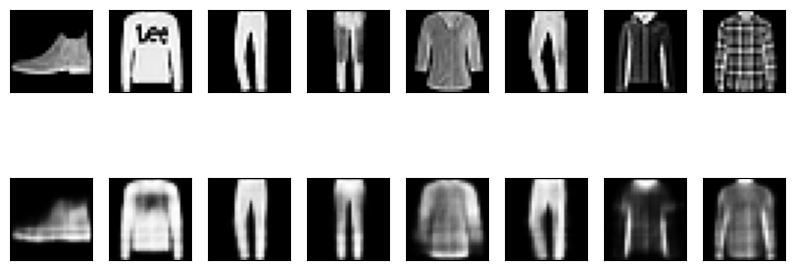

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 데이터 로드 및 전처리
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# 오토인코더 모델 생성
input_dim = 784  # 입력 차원 설정
encoding_dim = 32  # 잠재 공간 차원 설정

# 인코더 모델
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)

# 디코더 모델
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# 오토인코더 모델
autoencoder = Model(input_img, decoded)

# 오토인코더 모델 컴파일
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 오토인코더 모델 학습
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# 잠재 공간에서 샘플링하여 이미지 생성
n = 8  # 생성할 이미지 개수
encoded_imgs = autoencoder.predict(x_test[:n])

# 생성된 이미지 출력
plt.figure(figsize=(10, 4))
for i in range(n):
    # 원본 이미지 출력
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 생성된 이미지 출력
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
